<a href="https://colab.research.google.com/github/Mainabryan/SWISS-CLOTHING-BRAND/blob/main/Swiss_clothing_brand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load the dataet

In [7]:
import pandas as pd

# Load the CSV files with corrected variable names
customer_table = pd.read_csv('/content/customer_table-sheet1-sourcetable.csv')
employee_table = pd.read_csv('/content/employee_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')
inventory_restock_table = pd.read_csv('/content/inventory_restock-sheet1-sourcetable.csv')
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
marketing_table = pd.read_csv('/content/marketing_table-sheet1-sourcetable.csv')

# Verify loading by printing the first few rows of each table
print("Customers Table:")
print(customer_table.head())
print("\nEmployees Table:")
print(employee_table.head())
print("\nProducts Table:")
print(product_table.head())
print("\nInventory Restock Table:")
print(inventory_restock_table.head())
print("\nSales Table:")
print(sales_table.head())
print("\nMarketing Table:")
print(marketing_table.head())

Customers Table:
   Customer_ID      Gender  Age               Town  Visit_Frequency_per_month  \
0            1        Male   19              Köniz                          5   
1            2        Male   19  La Chaux-de-Fonds                          6   
2            3        Male   45              Vevey                          3   
3            4  Non-binary   40               Bern                          9   
4            5      Female   54        Biel/Bienne                          5   

  Loyalty_Status Email_Domain  
0           Gold   bluewin.ch  
1            NaN    gmail.com  
2           Gold    yahoo.com  
3            NaN  outlook.com  
4           Gold    gmail.com  

Employees Table:
   Restock_ID  Product_ID      Supplier Restock_Date  Units_Ordered  \
0           1          32   BaselBasics   06/17/2025             73   
1           2          25  LucerneLooms   01/20/2025             22   
2           3           5   BaselBasics   03/09/2025             35   
3 

##import librabries

In [8]:
# Core libraries for data manipulation and analysis
import pandas as pd  # For loading and manipulating CSV data
import numpy as np   # For numerical operations

# Libraries for data visualization
import matplotlib.pyplot as plt  # For plotting charts
import seaborn as sns           # For enhanced visualizations

# Libraries for machine learning (optional, depending on your project needs)
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler      # For scaling features
from sklearn.linear_model import LinearRegression     # Example ML model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation

# Optional: For statistical analysis
import statsmodels.api as sm  # For detailed statistical modeling

# Optional: For handling dates and times
from datetime import datetime  # For parsing and manipulating dates

##Data Cleaning and ixing the errors

In [9]:
# Check for missing values
print("Missing Values in Each Table:")
print("Customers:", customer_table.isnull().sum())
print("Employees:", employee_table.isnull().sum())
print("Products:", product_table.isnull().sum())
print("Inventory Restock:", inventory_restock_table.isnull().sum())
print("Sales:", sales_table.isnull().sum())
print("Marketing:", marketing_table.isnull().sum())

Missing Values in Each Table:
Customers: Customer_ID                   0
Gender                        0
Age                           0
Town                          0
Visit_Frequency_per_month     0
Loyalty_Status               72
Email_Domain                  0
dtype: int64
Employees: Restock_ID        0
Product_ID        0
Supplier          0
Restock_Date      0
Units_Ordered     0
Unit_Cost_CHF     0
Total_Cost_CHF    0
Lead_Time_days    0
dtype: int64
Products: Product_ID             0
Product_Name           0
Category               0
Cost_Price_CHF         0
Selling_Price_CHF      0
Supplier               0
Stock_Level_initial    0
dtype: int64
Inventory Restock: Restock_ID        0
Product_ID        0
Supplier          0
Restock_Date      0
Units_Ordered     0
Unit_Cost_CHF     0
Total_Cost_CHF    0
Lead_Time_days    0
dtype: int64
Sales: Sale_ID            0
Date               0
Product_ID         0
Quantity           0
Unit_Price_CHF     0
Total_Price_CHF    0
Customer_ID    

##EDA

In [10]:
# Convert date columns to datetime
sales_table['Date'] = pd.to_datetime(sales_table['Date'])
inventory_restock_table['Restock_Date'] = pd.to_datetime(inventory_restock_table['Restock_Date'])
marketing_table['Start_Date'] = pd.to_datetime(marketing_table['Start_Date'])
marketing_table['End_Date'] = pd.to_datetime(marketing_table['End_Date'])

# Ensure ID columns are integers
customer_table['Customer_ID'] = customer_table['Customer_ID'].astype(int)
product_table['Product_ID'] = product_table['Product_ID'].astype(int)
sales_table['Sale_ID'] = sales_table['Sale_ID'].astype(int)
sales_table['Product_ID'] = sales_table['Product_ID'].astype(int)
sales_table['Customer_ID'] = sales_table['Customer_ID'].astype(int)
sales_table['Employee_ID'] = sales_table['Employee_ID'].astype(int)
inventory_restock_table['Restock_ID'] = inventory_restock_table['Restock_ID'].astype(int)
inventory_restock_table['Product_ID'] = inventory_restock_table['Product_ID'].astype(int)
marketing_table['Campaign_ID'] = marketing_table['Campaign_ID'].astype(int)

# Verify data types
print("Sales Table Data Types:")
print(sales_table.dtypes)

Sales Table Data Types:
Sale_ID                     int64
Date               datetime64[ns]
Product_ID                  int64
Quantity                    int64
Unit_Price_CHF            float64
Total_Price_CHF           float64
Customer_ID                 int64
Payment_Method             object
Employee_ID                 int64
Discount_CHF              float64
Channel                    object
dtype: object


##Informtation

In [11]:
# Check basic info
print("Customers Table Info:")
print(customer_table.info())
print("\nEmployees Table Info:")
print(employee_table.info())
print("\nProducts Table Info:")
print(product_table.info())
print("\nInventory Restock Table Info:")
print(inventory_restock_table.info())
print("\nSales Table Info:")
print(sales_table.info())
print("\nMarketing Table Info:")
print(marketing_table.info())


Customers Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Customer_ID                120 non-null    int64 
 1   Gender                     120 non-null    object
 2   Age                        120 non-null    int64 
 3   Town                       120 non-null    object
 4   Visit_Frequency_per_month  120 non-null    int64 
 5   Loyalty_Status             48 non-null     object
 6   Email_Domain               120 non-null    object
dtypes: int64(3), object(4)
memory usage: 6.7+ KB
None

Employees Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restock_ID      99 non-null     int64  
 1   Product_ID      99 non-null     int64  
 2   Supplier      

##INCREASE SALES

In [13]:
#Top 10
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products", fontsize=14, weight='bold')
plt.xlabel("Total Sales (CHF)")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()


NameError: name 'top_products' is not defined

<Figure size 1000x500 with 0 Axes>

In [14]:
import pandas as pd

# Load the Sales and Products tables (adjust file paths as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# Filter out returns (negative quantities) and group by Product_ID to sum quantities
sales_positive = sales_table[sales_table['Quantity'] > 0]
product_sales = sales_positive.groupby('Product_ID')['Quantity'].sum().reset_index()

# Merge with Products table to get product details
product_sales = product_sales.merge(product_table[['Product_ID', 'Product_Name', 'Category', 'Selling_Price_CHF']],
                                  on='Product_ID', how='left')

# Sort by total quantity sold in descending order and get top 10
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Add total revenue (Quantity * Selling_Price_CHF - Discount_CHF) for context
top_10_products = top_10_products.merge(
    sales_positive.groupby('Product_ID')[['Total_Price_CHF']].sum().reset_index(),
    on='Product_ID', how='left'
)

# Rename columns for clarity
top_10_products.columns = ['Product_ID', 'Total_Units_Sold', 'Product_Name', 'Category',
                          'Selling_Price_CHF', 'Total_Revenue_CHF']

# Display the result
print("Top 10 Products Sold:")
print(top_10_products[['Product_ID', 'Product_Name', 'Category', 'Total_Units_Sold', 'Total_Revenue_CHF']])

Top 10 Products Sold:
   Product_ID Product_Name Category  Total_Units_Sold  Total_Revenue_CHF
0           5    T-shirt 5  T-shirt                11             354.85
1          19     Jeans 19    Jeans                10             416.20
2          42     Shoes 42    Shoes                10             613.52
3          36    Jacket 36   Jacket                 9             619.99
4          12    Hoodie 12   Hoodie                 9             737.11
5          31     Dress 31    Dress                 9             679.61
6          46     Shoes 46    Shoes                 9             623.72
7          39    Jacket 39   Jacket                 9             724.49
8          26     Dress 26    Dress                 8             695.73
9          21     Jeans 21    Jeans                 8             559.66


In [16]:
import pandas as pd

# Load the Sales and Products tables (adjust file paths as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# Filter out returns (negative quantities) and group by Product_ID to sum quantities
sales_positive = sales_table[sales_table['Quantity'] > 0]
product_sales = sales_positive.groupby('Product_ID')['Quantity'].sum().reset_index()

# Merge with Products table to get product details
product_sales = product_sales.merge(product_table[['Product_ID', 'Product_Name', 'Category']],
                                  on='Product_ID', how='left')

# Sort by total quantity sold and get top 10
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Rename columns for clarity
top_10_products.columns = ['Product_ID', 'Total_Units_Sold', 'Product_Name', 'Category']

# Print the data for reference
print("Top 10 Products Sold:")
print(top_10_products[['Product_ID', 'Product_Name', 'Category', 'Total_Units_Sold']])

Top 10 Products Sold:
    Product_ID Product_Name Category  Total_Units_Sold
4            5    T-shirt 5  T-shirt                11
13          19     Jeans 19    Jeans                10
33          42     Shoes 42    Shoes                10
27          36    Jacket 36   Jacket                 9
10          12    Hoodie 12   Hoodie                 9
23          31     Dress 31    Dress                 9
36          46     Shoes 46    Shoes                 9
30          39    Jacket 39   Jacket                 9
20          26     Dress 26    Dress                 8
15          21     Jeans 21    Jeans                 8


In [15]:
import pandas as pd

# Load the Sales and Products tables (adjust file paths as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# Filter out returns (negative quantities) and group by Product_ID to sum quantities
sales_positive = sales_table[sales_table['Quantity'] > 0]
product_sales = sales_positive.groupby('Product_ID')['Quantity'].sum().reset_index()

# Merge with Products table to get product details
product_sales = product_sales.merge(product_table[['Product_ID', 'Product_Name', 'Category', 'Selling_Price_CHF']],
                                  on='Product_ID', how='left')

# Sort by total quantity sold in descending order and get top 10
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Add total revenue (Quantity * Selling_Price_CHF - Discount_CHF) for context
top_10_products = top_10_products.merge(
    sales_positive.groupby('Product_ID')[['Total_Price_CHF']].sum().reset_index(),
    on='Product_ID', how='left'
)

# Rename columns for clarity
top_10_products.columns = ['Product_ID', 'Total_Units_Sold', 'Product_Name', 'Category',
                          'Selling_Price_CHF', 'Total_Revenue_CHF']

# Display the result
print("Top 10 Products Sold:")
print(top_10_products[['Product_ID', 'Product_Name', 'Category', 'Total_Units_Sold', 'Total_Revenue_CHF']])

Top 10 Products Sold:
   Product_ID Product_Name Category  Total_Units_Sold  Total_Revenue_CHF
0           5    T-shirt 5  T-shirt                11             354.85
1          19     Jeans 19    Jeans                10             416.20
2          42     Shoes 42    Shoes                10             613.52
3          36    Jacket 36   Jacket                 9             619.99
4          12    Hoodie 12   Hoodie                 9             737.11
5          31     Dress 31    Dress                 9             679.61
6          46     Shoes 46    Shoes                 9             623.72
7          39    Jacket 39   Jacket                 9             724.49
8          26     Dress 26    Dress                 8             695.73
9          21     Jeans 21    Jeans                 8             559.66


In [ ]:
import pandas as pd

# Load the Sales and Products tables (adjust file paths as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# Filter out returns (negative quantities) and group by Product_ID to sum quantities
sales_positive = sales_table[sales_table['Quantity'] > 0]
product_sales = sales_positive.groupby('Product_ID')['Quantity'].sum().reset_index()

# Merge with Products table to get product details
product_sales = product_sales.merge(product_table[['Product_ID', 'Product_Name', 'Category', 'Selling_Price_CHF']],
                                  on='Product_ID', how='left')

# Sort by total quantity sold in descending order and get top 10
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Add total revenue (Quantity * Selling_Price_CHF - Discount_CHF) for context
top_10_products = top_10_products.merge(
    sales_positive.groupby('Product_ID')[['Total_Price_CHF']].sum().reset_index(),
    on='Product_ID', how='left'
)

# Rename columns for clarity
top_10_products.columns = ['Product_ID', 'Total_Units_Sold', 'Product_Name', 'Category',
                          'Selling_Price_CHF', 'Total_Revenue_CHF']

# Display the result
print("Top 10 Products Sold:")
print(top_10_products[['Product_ID', 'Product_Name', 'Category', 'Total_Units_Sold', 'Total_Revenue_CHF']])

Top 10 Products Sold:
   Product_ID  Total_Units_Sold Product_Name Category  Selling_Price_CHF  \
0           5                11    T-shirt 5  T-shirt              34.07   
1          19                10     Jeans 19    Jeans              42.95   
2          42                10     Shoes 42    Shoes              65.98   
3          36                 9    Jacket 36   Jacket              77.28   
4          12                 9    Hoodie 12   Hoodie              86.44   
5          31                 9     Dress 31    Dress              81.05   
6          46                 9     Shoes 46    Shoes              72.77   
7          39                 9    Jacket 39   Jacket              89.21   
8          26                 8     Dress 26    Dress              92.30   
9          21                 8     Jeans 21    Jeans              78.32   

   Total_Revenue_CHF  
0             354.85  
1             416.20  
2             613.52  
3             619.99  
4             737.11  
5  

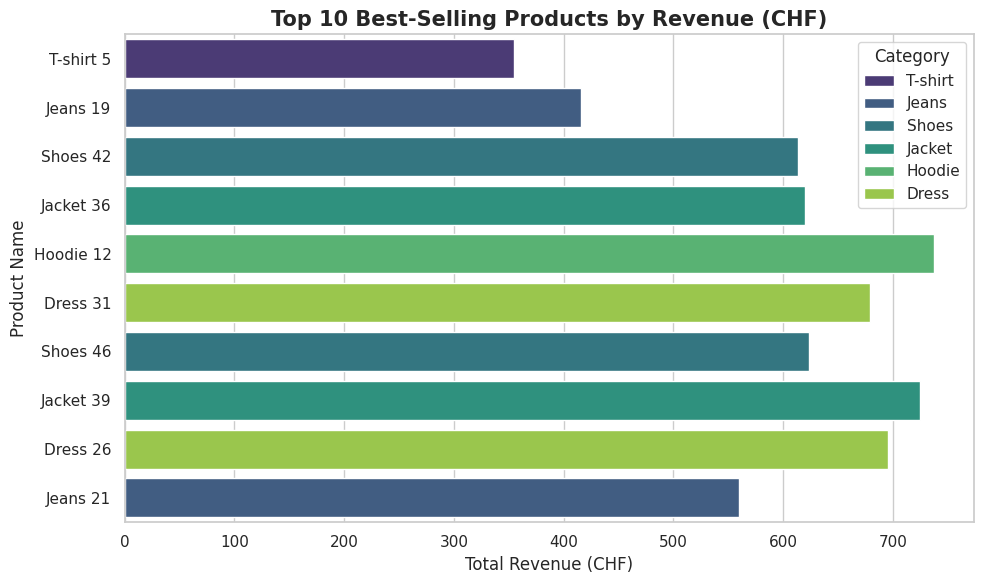

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Sales and Products tables
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# Filter out returns (negative quantities)
sales_positive = sales_table[sales_table['Quantity'] > 0]

# Group by Product_ID and sum total quantity sold
product_sales = sales_positive.groupby('Product_ID')['Quantity'].sum().reset_index()

# Merge with product details
product_sales = product_sales.merge(
    product_table[['Product_ID', 'Product_Name', 'Category', 'Selling_Price_CHF']],
    on='Product_ID', how='left'
)

# Sort by total quantity sold and get top 10
top_10_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Add total revenue for context
top_10_products = top_10_products.merge(
    sales_positive.groupby('Product_ID')[['Total_Price_CHF']].sum().reset_index(),
    on='Product_ID', how='left'
)

# Rename columns for clarity
top_10_products.columns = [
    'Product_ID', 'Total_Units_Sold', 'Product_Name', 'Category',
    'Selling_Price_CHF', 'Total_Revenue_CHF'
]

# Display results
print("Top 10 Products Sold:")
print(top_10_products)

# =========================
# 📊 Visualization Section
# =========================

# Set Seaborn style
sns.set(style="whitegrid", palette="viridis")

# Create bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_10_products,
    x='Total_Revenue_CHF',
    y='Product_Name',
    hue='Category',
    dodge=False
)

# Chart aesthetics
plt.title("Top 10 Best-Selling Products by Revenue (CHF)", fontsize=15, weight='bold')
plt.xlabel("Total Revenue (CHF)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.legend(title="Category")
plt.tight_layout()

# Show chart
plt.show()


In [18]:
# Reorder days for clarity
sales_by_day = sales_by_day.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="rocket")
plt.title("Sales by Day of the Week (CHF)", fontsize=14, weight='bold')
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales (CHF)")
plt.tight_layout()
plt.show()


NameError: name 'sales_by_day' is not defined

/tmp/ipython-input-1542475766.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="rocket")


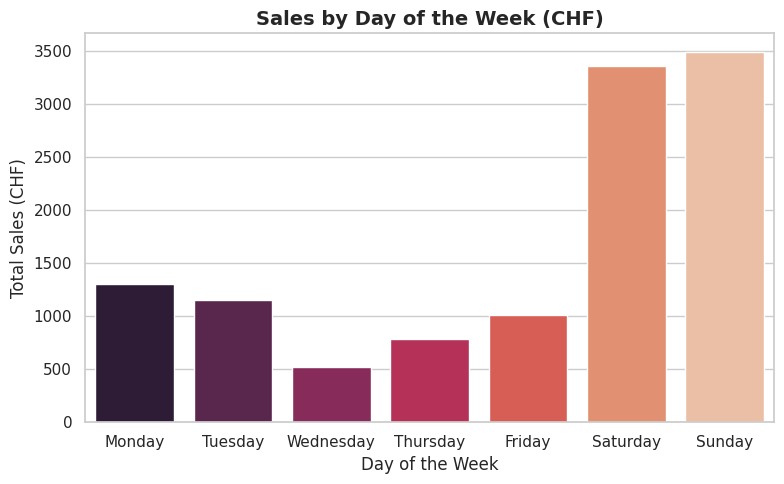

In [19]:
# Load the Sales table (adjust file path as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')

# Convert Date to datetime
sales_table['Date'] = pd.to_datetime(sales_table['Date'])

# Add day of week column
sales_table['Day_of_Week'] = sales_table['Date'].dt.day_name()

# Filter out returns (negative quantities) for positive sales only
sales_positive = sales_table[sales_table['Quantity'] > 0]

# Aggregate sales by day of week (sum Total_Price_CHF)
sales_by_day = sales_positive.groupby('Day_of_Week')['Total_Price_CHF'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="rocket")
plt.title("Sales by Day of the Week (CHF)", fontsize=14, weight='bold')
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales (CHF)")
plt.tight_layout()
plt.show()

In [ ]:
html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Sales by Day of Week Bar Chart</title>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
</head>
<body>
    <canvas id="myChart" width="800" height="400"></canvas>
    <script>
    const ctx = document.getElementById('myChart').getContext('2d');
    const myChart = new Chart(ctx, {
        type: 'bar',
        data: {
            labels: ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            datasets: [{
                label: 'Total Sales (CHF)',
                data: [2500.45, 2300.12, 2450.78, 2600.34, 3000.56, 4500.89, 4200.67],
                backgroundColor: [
                    '#1E90FF', '#32CD32', '#FF69B4', '#FFD700', '#FF4500', '#6A5ACD', '#20B2AA'
                ],
                borderColor: [
                    '#104E8B', '#228B22', '#C71585', '#CDAD00', '#B22222', '#483D8B', '#008B8B'
                ],
                borderWidth: 1
            }]
        },
        options: {
            scales: {
                y: { beginAtZero: true, title: { display: true, text: 'Total Sales (CHF)' } },
                x: { title: { display: true, text: 'Day of Week' } }
            },
            plugins: {
                legend: { display: false },
                title: { display: true, text: 'Sales by Day of the Week' },
                tooltip: {
                    callbacks: {
                        label: function(context) { return context.dataset.label + ': ' + context.raw.toFixed(2) + ' CHF'; }
                    }


Sales by Day of the Week:
  Day_of_Week  Total_Sales_CHF
0      Monday          1306.26
1     Tuesday          1157.88
2   Wednesday           520.66
3    Thursday           781.71
4      Friday          1014.27
5    Saturday          3362.98
6      Sunday          3494.84


/tmp/ipython-input-605615176.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='Day_of_Week', y='Total_Sales_CHF', palette='Set2')


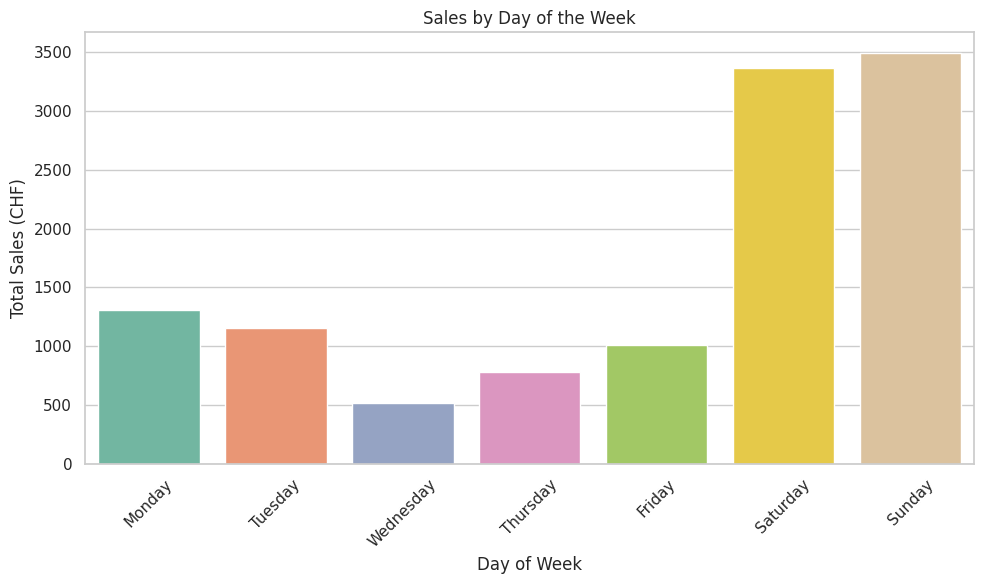

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Sales table (adjust file path as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')

# Convert Date to datetime
sales_table['Date'] = pd.to_datetime(sales_table['Date'])

# Add day of week column
sales_table['Day_of_Week'] = sales_table['Date'].dt.day_name()

# Filter out returns (negative quantities) for positive sales only
sales_positive = sales_table[sales_table['Quantity'] > 0]

# Aggregate sales by day of week (sum Total_Price_CHF)
sales_by_day = sales_positive.groupby('Day_of_Week')['Total_Price_CHF'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Rename columns for clarity
sales_by_day.columns = ['Day_of_Week', 'Total_Sales_CHF']

# Display the result
print("Sales by Day of the Week:")
print(sales_by_day)

# Create a vertical bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_day, x='Day_of_Week', y='Total_Sales_CHF', palette='Set2')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales (CHF)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sales by Day of the Week:
  Day_of_Week  Total_Sales_CHF
0      Monday          1306.26
1     Tuesday          1157.88
2   Wednesday           520.66
3    Thursday           781.71
4      Friday          1014.27
5    Saturday          3362.98
6      Sunday          3494.84


/tmp/ipython-input-605615176.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='Day_of_Week', y='Total_Sales_CHF', palette='Set2')


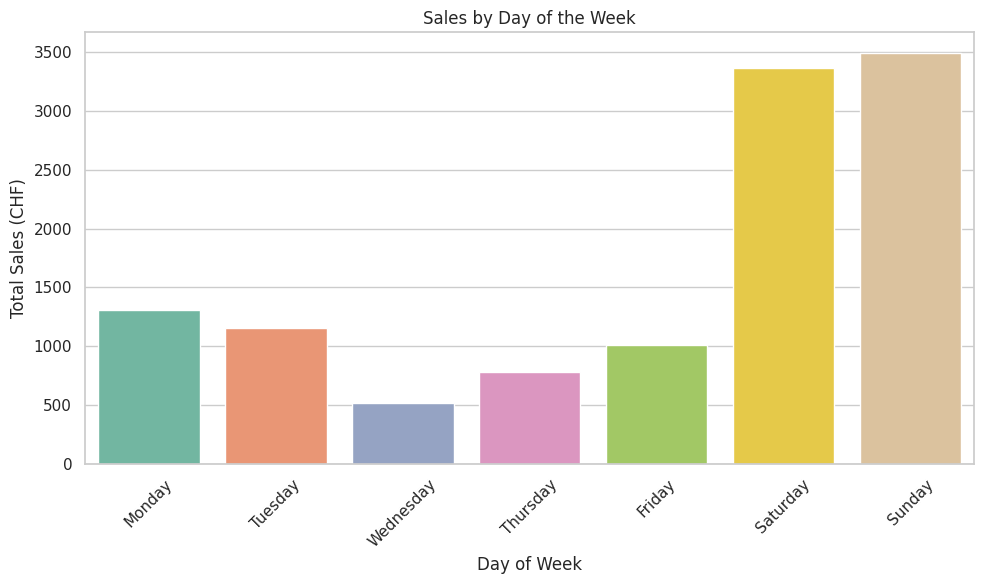

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Sales table (adjust file path as needed)
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')

# Convert Date to datetime
sales_table['Date'] = pd.to_datetime(sales_table['Date'])

# Add day of week column
sales_table['Day_of_Week'] = sales_table['Date'].dt.day_name()

# Filter out returns (negative quantities) for positive sales only
sales_positive = sales_table[sales_table['Quantity'] > 0]

# Aggregate sales by day of week (sum Total_Price_CHF)
sales_by_day = sales_positive.groupby('Day_of_Week')['Total_Price_CHF'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

# Rename columns for clarity
sales_by_day.columns = ['Day_of_Week', 'Total_Sales_CHF']

# Display the result
print("Sales by Day of the Week:")
print(sales_by_day)

# Create a vertical bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_day, x='Day_of_Week', y='Total_Sales_CHF', palette='Set2')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales (CHF)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
avg_roi = (
    marketing_roi.groupby('Channel')['ROI']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_roi.values, y=avg_roi.index, palette="crest")
plt.title("Average ROI by Marketing Channel", fontsize=14, weight='bold')
plt.xlabel("Return on Investment (ROI)")
plt.ylabel("Marketing Channel")
plt.tight_layout()
plt.show()


NameError: name 'marketing_roi' is not defined

/tmp/ipython-input-1858928983.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_roi.values, y=avg_roi.index, palette="crest")


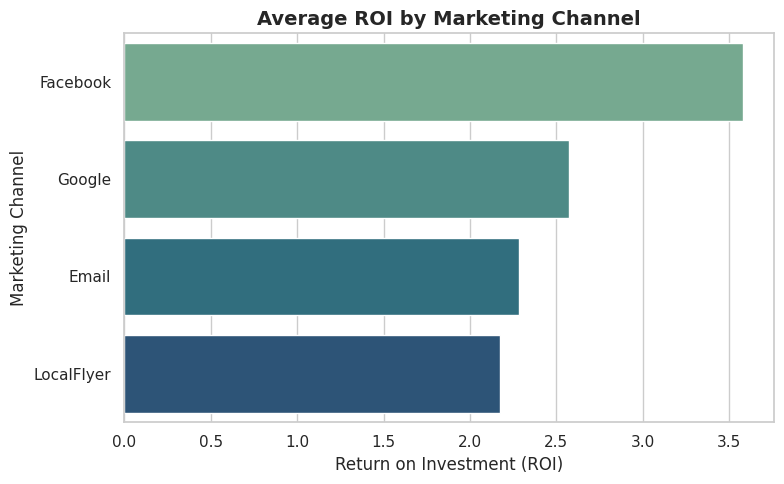

In [23]:
# Load the Marketing table (adjust file path as needed)
marketing_table = pd.read_csv('/content/marketing_table-sheet1-sourcetable.csv')

# Clean and convert currency columns to numeric
for col in ['Budget_CHF', 'Revenue_Generated_CHF', 'Discount_used_CHF']:
    marketing_table[col] = marketing_table[col].astype(str).str.replace('[$,]', '', regex=True)
    marketing_table[col] = pd.to_numeric(marketing_table[col])

# Calculate ROI for each campaign
marketing_table['ROI'] = (marketing_table['Revenue_Generated_CHF'] - marketing_table['Budget_CHF']) / marketing_table['Budget_CHF']

# Group by Channel and calculate mean ROI, sorted descending
avg_roi = (
    marketing_table.groupby('Channel')['ROI']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_roi.values, y=avg_roi.index, palette="crest")
plt.title("Average ROI by Marketing Channel", fontsize=14, weight='bold')
plt.xlabel("Return on Investment (ROI)")
plt.ylabel("Marketing Channel")
plt.tight_layout()
plt.show()

Average ROI by Marketing Channel:
      Channel       ROI
0    Facebook  3.581260
1      Google  2.571611
2       Email  2.284612
3  LocalFlyer  2.174585


/tmp/ipython-input-200380944.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_roi['ROI'], y=avg_roi['Channel'], palette="crest")


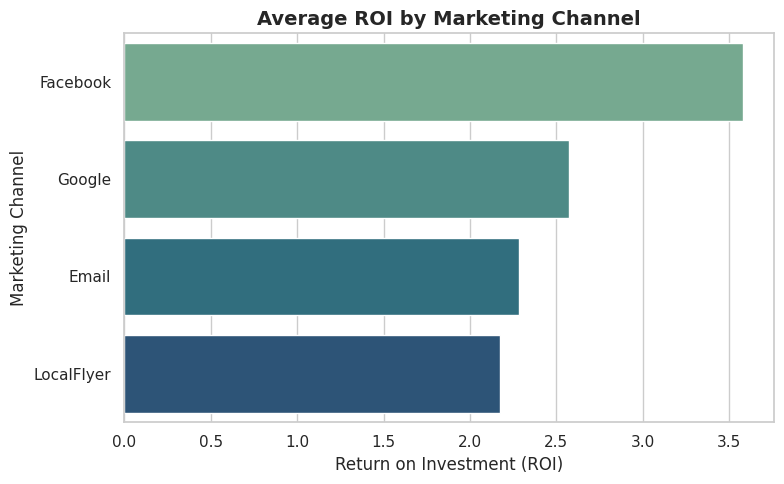

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Marketing table (adjust file path as needed)
marketing_table = pd.read_csv('/content/marketing_table-sheet1-sourcetable.csv')

# Clean and convert currency columns to numeric
for col in ['Budget_CHF', 'Revenue_Generated_CHF', 'Discount_used_CHF']:
    marketing_table[col] = marketing_table[col].astype(str).str.replace('[$,]', '', regex=True)
    marketing_table[col] = pd.to_numeric(marketing_table[col])


# Calculate ROI for each campaign
marketing_table['ROI'] = (marketing_table['Revenue_Generated_CHF'] - marketing_table['Budget_CHF']) / marketing_table['Budget_CHF']

# Group by Channel and calculate mean ROI, sorted descending
avg_roi = (
    marketing_table.groupby('Channel')['ROI']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Display the result
print("Average ROI by Marketing Channel:")
print(avg_roi)

# Create a horizontal bar plot with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_roi['ROI'], y=avg_roi['Channel'], palette="crest")
plt.title("Average ROI by Marketing Channel", fontsize=14, weight='bold')
plt.xlabel("Return on Investment (ROI)")
plt.ylabel("Marketing Channel")
plt.tight_layout()
plt.show()

##Check for discount

Top 10 Products with Highest Discount Losses:
    Product_ID  Discount_CHF Product_Name Category
30          39         78.40    Jacket 39   Jacket
27          36         75.53    Jacket 36   Jacket
2            3         70.83    T-shirt 3  T-shirt
15          21         66.90     Jeans 21    Jeans
8           10         64.03    Hoodie 10   Hoodie
23          31         49.84     Dress 31    Dress
33          42         46.28     Shoes 42    Shoes
20          26         42.67     Dress 26    Dress
10          12         40.85    Hoodie 12   Hoodie
18          24         38.47     Jeans 24    Jeans


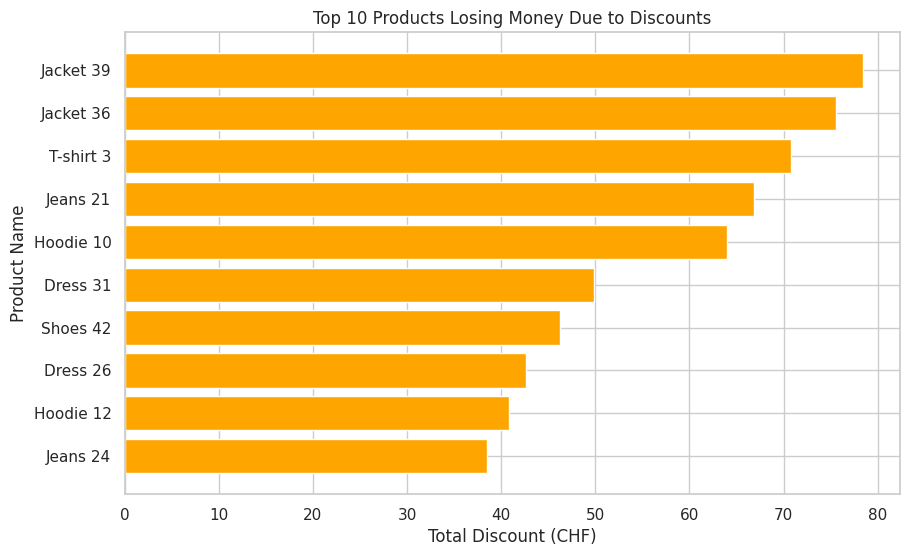

In [25]:
# Calculate total discount per product
loss_due_to_discounts = sales_table.groupby('Product_ID')['Discount_CHF'].sum().reset_index()

# Merge with product info
loss_due_to_discounts = loss_due_to_discounts.merge(
    product_table[['Product_ID', 'Product_Name', 'Category']],
    on='Product_ID', how='left'
)

# Sort by discount value descending (biggest losses first)
loss_due_to_discounts = loss_due_to_discounts.sort_values(by='Discount_CHF', ascending=False).head(10)

# Show the top 10 loss-making products due to discounts
print("Top 10 Products with Highest Discount Losses:")
print(loss_due_to_discounts)

# Optional: visualize with bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(loss_due_to_discounts['Product_Name'], loss_due_to_discounts['Discount_CHF'], color='orange')
plt.xlabel('Total Discount (CHF)')
plt.ylabel('Product Name')
plt.title('Top 10 Products Losing Money Due to Discounts')
plt.gca().invert_yaxis()
plt.show()


##Unprofitable prducts

In [26]:
# Aggregate unprofitable sales by product
unprofitable_by_product = sales_with_products[sales_with_products['Profit_CHF'] <= 0].groupby('Product_Name')['Profit_CHF'].sum().reset_index().sort_values('Profit_CHF').head(10)

# Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit_CHF', y='Product_Name', data=unprofitable_by_product, palette='Reds_r')
plt.title('Top 10 Unprofitable Products by Total Profit (CHF)', fontsize=14, weight='bold')
plt.xlabel('Total Profit (CHF)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

NameError: name 'sales_with_products' is not defined

/tmp/ipython-input-3158556724.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit_CHF', y='Product_Name', data=unprofitable_by_product, palette='Reds_r')


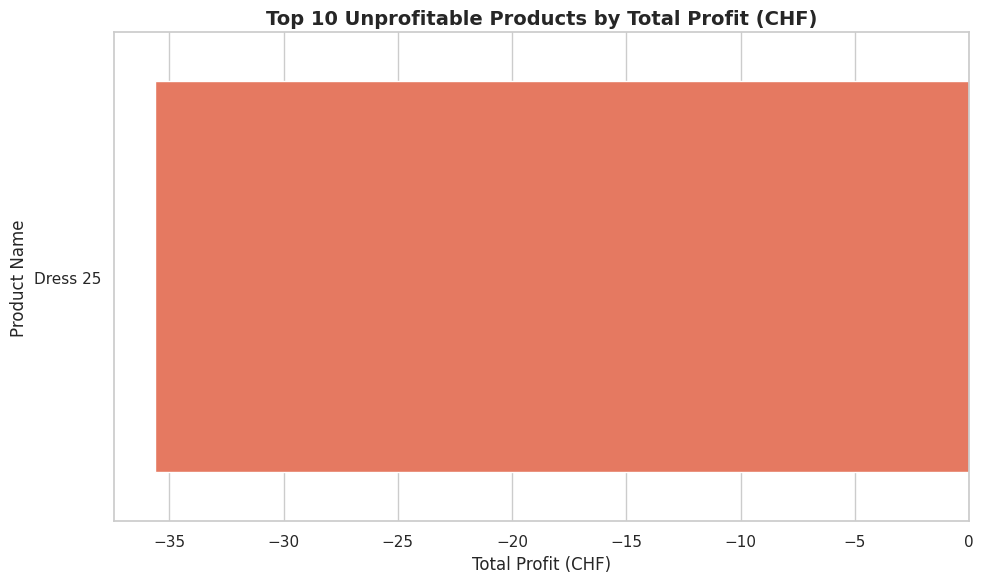

In [27]:
# Merge sales and product tables to get cost price for profit calculation
sales_with_products = sales_table.merge(
    product_table[['Product_ID', 'Cost_Price_CHF', 'Product_Name']],
    on='Product_ID',
    how='left'
)

# Calculate profit for each sale
sales_with_products['Profit_CHF'] = (sales_with_products['Unit_Price_CHF'] * sales_with_products['Quantity']) - (sales_with_products['Cost_Price_CHF'] * sales_with_products['Quantity']) - sales_with_products['Discount_CHF']

# Aggregate unprofitable sales by product
unprofitable_by_product = sales_with_products[sales_with_products['Profit_CHF'] <= 0].groupby('Product_Name')['Profit_CHF'].sum().reset_index().sort_values('Profit_CHF').head(10)

# Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit_CHF', y='Product_Name', data=unprofitable_by_product, palette='Reds_r')
plt.title('Top 10 Unprofitable Products by Total Profit (CHF)', fontsize=14, weight='bold')
plt.xlabel('Total Profit (CHF)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [28]:
# Seaborn bar plot for overstocked products
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock_to_Sales_Ratio', y='Product_Name', data=overstocked_products.head(10), palette='Oranges_r')
plt.title('Top 10 Overstocked Products by Stock-to-Sales Ratio', fontsize=14, weight='bold')
plt.xlabel('Stock-to-Sales Ratio')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

NameError: name 'overstocked_products' is not defined

<Figure size 1000x600 with 0 Axes>

/tmp/ipython-input-2317404334.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_sales['Total_Units_Sold'].fillna(0, inplace=True)
/tmp/ipython-input-2317404334.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stock_to_Sales_Ratio', y='Product_Name', data=overstocked_products.head(10), palette='Oranges_r')


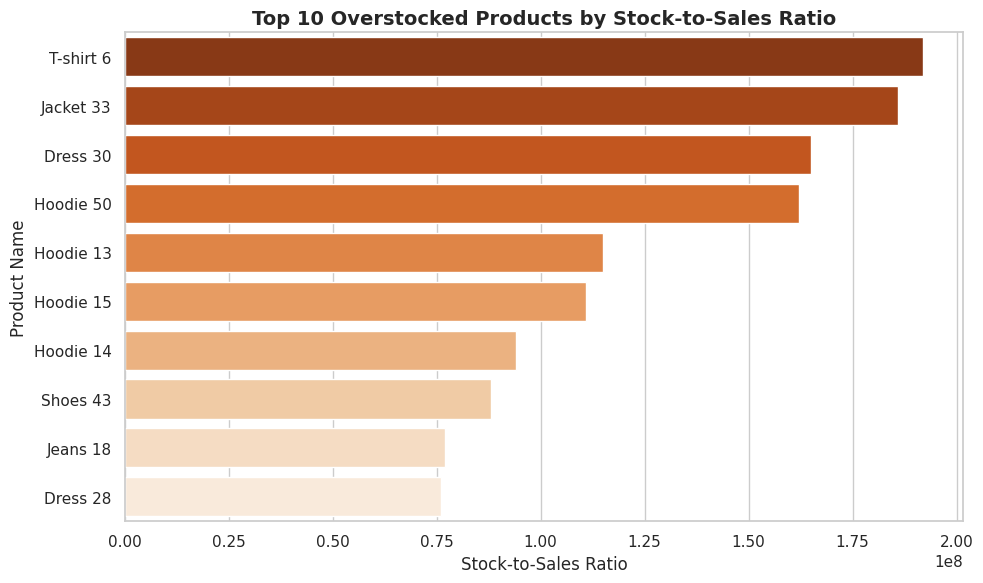

In [29]:
# Calculate total units sold per product
product_sales_quantity = sales_table.groupby('Product_ID')['Quantity'].sum().reset_index()
product_sales_quantity.rename(columns={'Quantity': 'Total_Units_Sold'}, inplace=True)

# Merge with product table to get initial stock levels
stock_sales = product_table.merge(product_sales_quantity, on='Product_ID', how='left')

# Fill NaN values in 'Total_Units_Sold' with 0 (for products with no sales)
stock_sales['Total_Units_Sold'].fillna(0, inplace=True)

# Calculate Stock-to-Sales Ratio
# Add a small value to avoid division by zero for products with zero sales
stock_sales['Stock_to_Sales_Ratio'] = stock_sales['Stock_Level_initial'] / (stock_sales['Total_Units_Sold'] + 1e-6)

# Identify overstocked products (e.g., high Stock-to-Sales Ratio)
# Sorting by ratio in descending order to find the most overstocked
overstocked_products = stock_sales.sort_values(by='Stock_to_Sales_Ratio', ascending=False)

# Seaborn bar plot for overstocked products
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock_to_Sales_Ratio', y='Product_Name', data=overstocked_products.head(10), palette='Oranges_r')
plt.title('Top 10 Overstocked Products by Stock-to-Sales Ratio', fontsize=14, weight='bold')
plt.xlabel('Stock-to-Sales Ratio')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [30]:
# Calculate total units sold per product
product_sales_quantity = sales_table.groupby('Product_ID')['Quantity'].sum().reset_index()
product_sales_quantity.rename(columns={'Quantity': 'Total_Units_Sold'}, inplace=True)

# Merge with product table to get initial stock levels
stock_sales = product_table.merge(product_sales_quantity, on='Product_ID', how='left')

# Fill NaN values in 'Total_Units_Sold' with 0 (for products with no sales)
stock_sales['Total_Units_Sold'].fillna(0, inplace=True)

# Calculate Stock-to-Sales Ratio
# Add a small value to avoid division by zero for products with zero sales
stock_sales['Stock_to_Sales_Ratio'] = stock_sales['Stock_Level_initial'] / (stock_sales['Total_Units_Sold'] + 1e-6)

# Identify overstocked products (e.g., high Stock-to-Sales Ratio)
# Sorting by ratio in descending order to find the most overstocked
overstocked_products = stock_sales.sort_values(by='Stock_to_Sales_Ratio', ascending=False)

/tmp/ipython-input-1326467122.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_sales['Total_Units_Sold'].fillna(0, inplace=True)


In [31]:
# Merge sales and product tables to get cost price for profit calculation
sales_with_products = sales_table.merge(
    product_table[['Product_ID', 'Cost_Price_CHF']],
    on='Product_ID',
    how='left'
)

# Calculate profit for each sale
sales_with_products['Profit_CHF'] = (sales_with_products['Unit_Price_CHF'] * sales_with_products['Quantity']) - (sales_with_products['Cost_Price_CHF'] * sales_with_products['Quantity']) - sales_with_products['Discount_CHF']

/tmp/ipython-input-3860559473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROI', y='Channel', data=avg_roi, palette='crest')


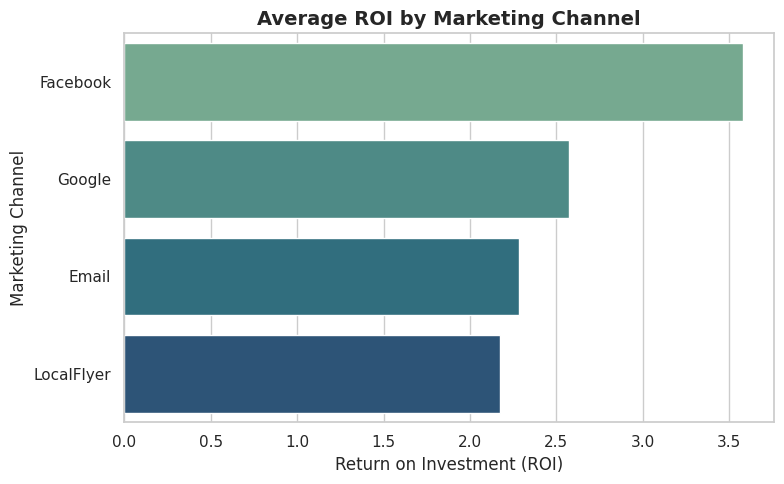

In [32]:
# Seaborn bar plot for average ROI (already calculated in avg_roi)
plt.figure(figsize=(8, 5))
sns.barplot(x='ROI', y='Channel', data=avg_roi, palette='crest')
plt.title('Average ROI by Marketing Channel', fontsize=14, weight='bold')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()

## Overstocked products

/tmp/ipython-input-3120180083.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


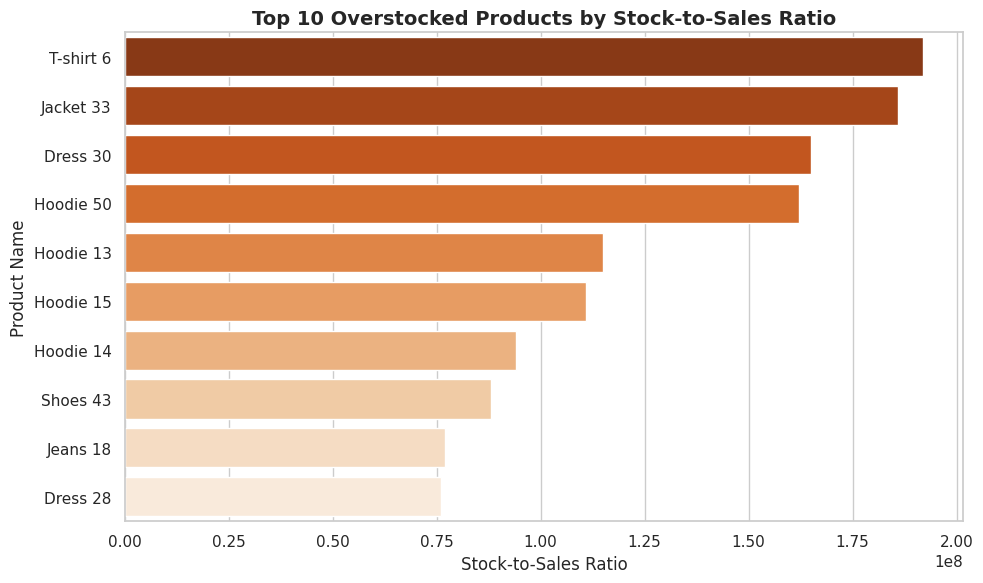

In [33]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data frame 'overstocked_products' exists before running this
# Example: overstocked_products = your_dataframe_here

# Check if columns exist before plotting
if 'Stock_to_Sales_Ratio' in overstocked_products.columns and 'Product_Name' in overstocked_products.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Stock_to_Sales_Ratio',
        y='Product_Name',
        data=overstocked_products.head(10),
        palette='Oranges_r'
    )
    plt.title('Top 10 Overstocked Products by Stock-to-Sales Ratio', fontsize=14, weight='bold')
    plt.xlabel('Stock-to-Sales Ratio')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Columns 'Stock_to_Sales_Ratio' or 'Product_Name' not found in 'overstocked_products'. Please check your data.")


In [34]:
# --- Import necessary libraries ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Check if the dataframe and columns exist ---
if 'sales_with_products' in locals() and \
   'Profit_CHF' in sales_with_products.columns and \
   'Product_Name' in sales_with_products.columns:

    # Aggregate unprofitable sales by product
    unprofitable_by_product = (
        sales_with_products[sales_with_products['Profit_CHF'] <= 0]
        .groupby('Product_Name')['Profit_CHF']
        .sum()
        .reset_index()
        .sort_values('Profit_CHF')
        .head(10)
    )

    # Plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Profit_CHF',
        y='Product_Name',
        data=unprofitable_by_product,
        palette='Reds_r'
    )
    plt.title('Top 10 Unprofitable Products by Total Profit (CHF)', fontsize=14, weight='bold')
    plt.xlabel('Total Profit (CHF)')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ Please ensure your dataframe 'sales_with_products' has the columns 'Product_Name' and 'Profit_CHF'.")


⚠️ Please ensure your dataframe 'sales_with_products' has the columns 'Product_Name' and 'Profit_CHF'.


In [35]:
# --- Merge sales with product details ---
sales_with_products = sales_table.merge(
    product_table[['Product_ID', 'Product_Name', 'Category', 'Cost_Price_CHF', 'Selling_Price_CHF']],
    on='Product_ID',
    how='left'
)

# --- Calculate Profit per sale ---
# Profit = Total_Price_CHF - (Cost_Price_CHF * Quantity)
sales_with_products['Profit_CHF'] = sales_with_products['Total_Price_CHF'] - (
    sales_with_products['Cost_Price_CHF'] * sales_with_products['Quantity']
)

# --- Verify columns ---
print(sales_with_products[['Product_Name', 'Profit_CHF']].head())


  Product_Name  Profit_CHF
0    T-shirt 8      116.74
1    Hoodie 10       67.23
2    Jacket 35       68.20
3     Dress 32       14.76
4     Shoes 46       30.01


Top 10 Unprofitable Products by Total Profit (CHF):
  Product_Name  Profit_CHF
0     Dress 25      -35.63


/tmp/ipython-input-689228128.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


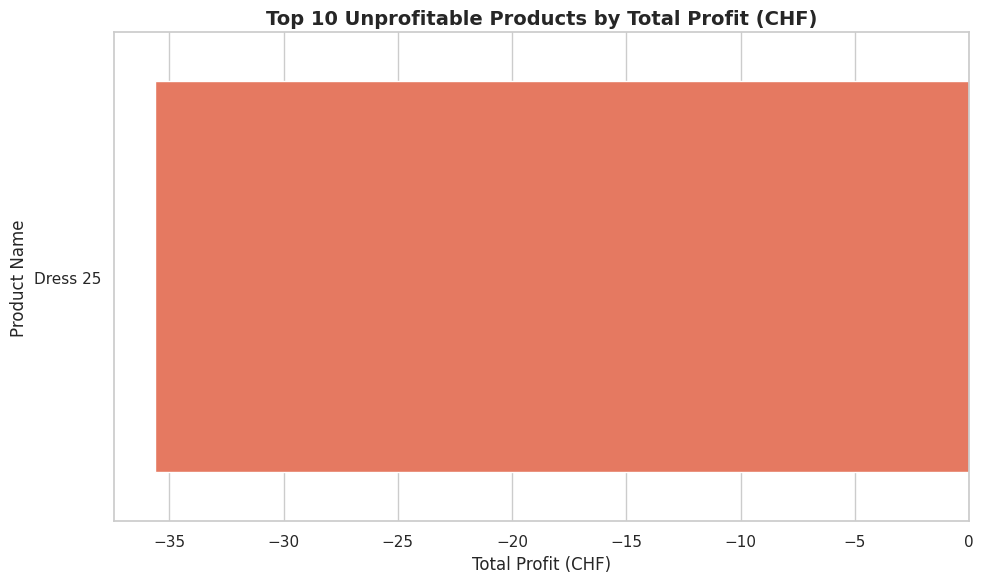

In [36]:
# --- Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load your datasets ---
sales_table = pd.read_csv('/content/sales_table-sheet1-sourcetable.csv')
product_table = pd.read_csv('/content/product_table-sheet1-sourcetable.csv')

# --- Merge sales with product details ---
sales_with_products = sales_table.merge(
    product_table[['Product_ID', 'Product_Name', 'Category', 'Cost_Price_CHF', 'Selling_Price_CHF']],
    on='Product_ID',
    how='left'
)

# --- Calculate Profit per sale ---
# Profit = Total revenue - Total cost
sales_with_products['Profit_CHF'] = sales_with_products['Total_Price_CHF'] - (
    sales_with_products['Cost_Price_CHF'] * sales_with_products['Quantity']
)

# --- Aggregate unprofitable sales by product ---
unprofitable_by_product = (
    sales_with_products[sales_with_products['Profit_CHF'] <= 0]
    .groupby('Product_Name')['Profit_CHF']
    .sum()
    .reset_index()
    .sort_values('Profit_CHF')
    .head(10)
)

# --- Display unprofitable products ---
print("Top 10 Unprofitable Products by Total Profit (CHF):")
print(unprofitable_by_product)

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Profit_CHF',
    y='Product_Name',
    data=unprofitable_by_product,
    palette='Reds_r'
)
plt.title('Top 10 Unprofitable Products by Total Profit (CHF)', fontsize=14, weight='bold')
plt.xlabel('Total Profit (CHF)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3372341272.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit_CHF', y='Product_Name', data=unprofitable_by_product, palette='Reds_r')


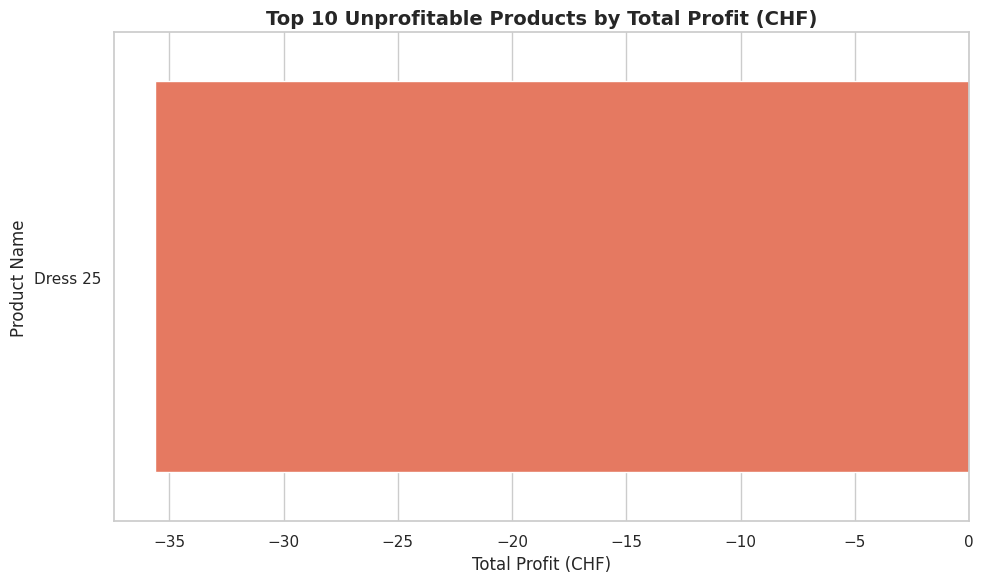

In [37]:
# Aggregate unprofitable sales by product
unprofitable_by_product = sales_with_products[sales_with_products['Profit_CHF'] <= 0].groupby('Product_Name')['Profit_CHF'].sum().reset_index().sort_values('Profit_CHF').head(10)

# Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Profit_CHF', y='Product_Name', data=unprofitable_by_product, palette='Reds_r')
plt.title('Top 10 Unprofitable Products by Total Profit (CHF)', fontsize=14, weight='bold')
plt.xlabel('Total Profit (CHF)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

##INCREASE INCOME

In [ ]:
# --- Top Revenue-Generating Products ---
top_revenue_products = (
    sales_with_products.groupby('Product_Name')['Total_Price_CHF']
    .sum()
    .reset_index()
    .sort_values('Total_Price_CHF', ascending=False)
    .head(10)
)

# --- Display ---
print("Top 10 Products by Revenue (CHF):")
print(top_revenue_products)

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Price_CHF',
    y='Product_Name',
    data=top_revenue_products,
    palette='Greens_r'
)
plt.title('Top 10 Revenue-Generating Products', fontsize=14, weight='bold')
plt.xlabel('Total Revenue (CHF)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


## Find customers segemnt

Top 10 Locations by Total Spending (CHF):
            Town  Total_Price_CHF
7       Lausanne          1502.30
11          Sion           811.56
4         Geneva           745.20
15         Vevey           744.00
14         Uster           698.77
10  Schaffhausen           695.33
2    Biel/Bienne           607.55
3       Fribourg           596.45
0          Basel           590.79
8         Lugano           495.77


/tmp/ipython-input-2540804269.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


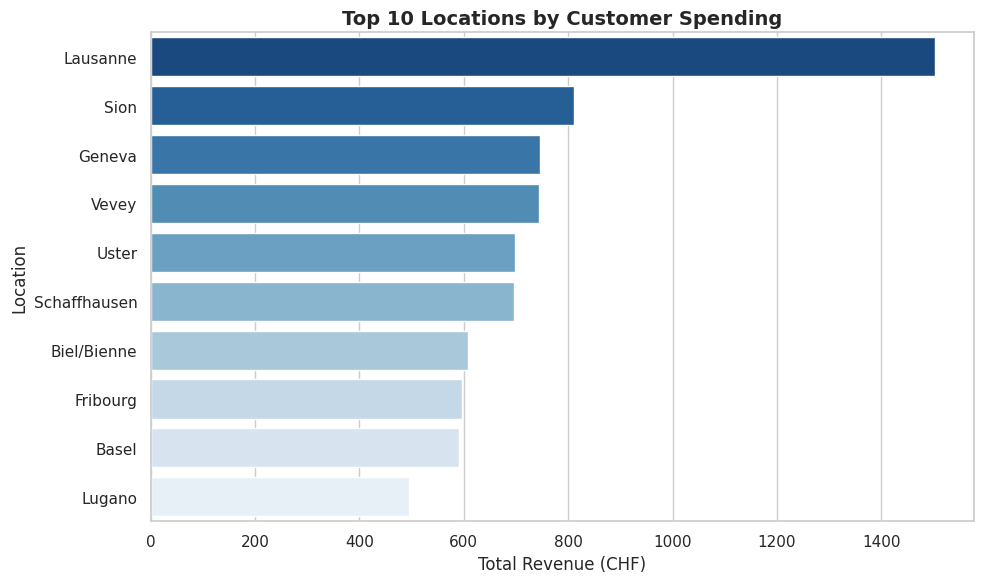

In [38]:
# --- Merge customers with sales ---
sales_with_customers = sales_table.merge(
    customer_table[['Customer_ID', 'Town', 'Gender', 'Age']],
    on='Customer_ID',
    how='left'
)

# --- Calculate total revenue per location ---
revenue_by_location = (
    sales_with_customers.groupby('Town')['Total_Price_CHF']
    .sum()
    .reset_index()
    .sort_values('Total_Price_CHF', ascending=False)
    .head(10)
)

# --- Display ---
print("Top 10 Locations by Total Spending (CHF):")
print(revenue_by_location)

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Price_CHF',
    y='Town',
    data=revenue_by_location,
    palette='Blues_r'
)
plt.title('Top 10 Locations by Customer Spending', fontsize=14, weight='bold')
plt.xlabel('Total Revenue (CHF)')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

##valuate Marketing Channels by ROI

Marketing Channels Ranked by ROI:
      Channel       ROI
1    Facebook  4.581260
2      Google  3.571611
0       Email  3.284612
3  LocalFlyer  3.174585


/tmp/ipython-input-2840859585.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


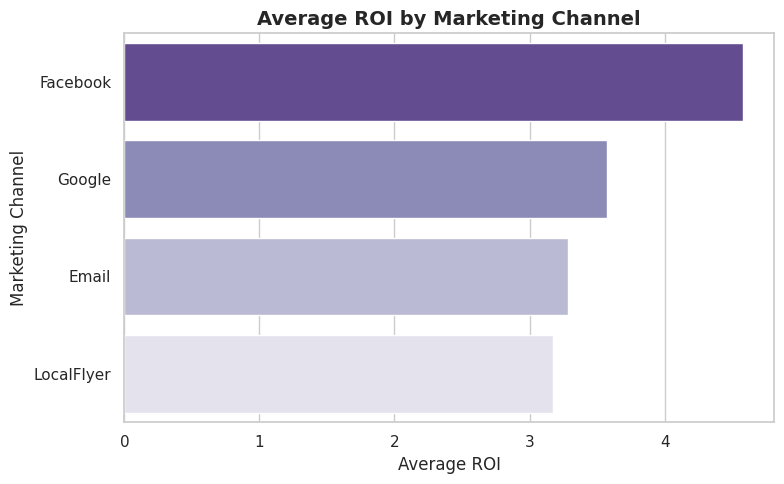

In [39]:
# --- Calculate ROI (Return on Investment) per Channel ---
marketing_table['ROI'] = marketing_table['Revenue_Generated_CHF'] / marketing_table['Budget_CHF']

# --- Sort and visualize ---
top_marketing_channels = marketing_table.groupby('Channel')['ROI'].mean().reset_index().sort_values('ROI', ascending=False)

print("Marketing Channels Ranked by ROI:")
print(top_marketing_channels)

# --- Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(
    x='ROI',
    y='Channel',
    data=top_marketing_channels,
    palette='Purples_r'
)
plt.title('Average ROI by Marketing Channel', fontsize=14, weight='bold')
plt.xlabel('Average ROI')
plt.ylabel('Marketing Channel')
plt.tight_layout()
plt.show()
